<a href="https://colab.research.google.com/github/ConqrGFX/Computational-Science/blob/main/computationalscience_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1.1

Take a 100X100 grid. You will need to simulate the movement of a cell (like the grey cell in the figure above). You will need to run the algorithm for a 100 steps, and plot the movement of the cell.

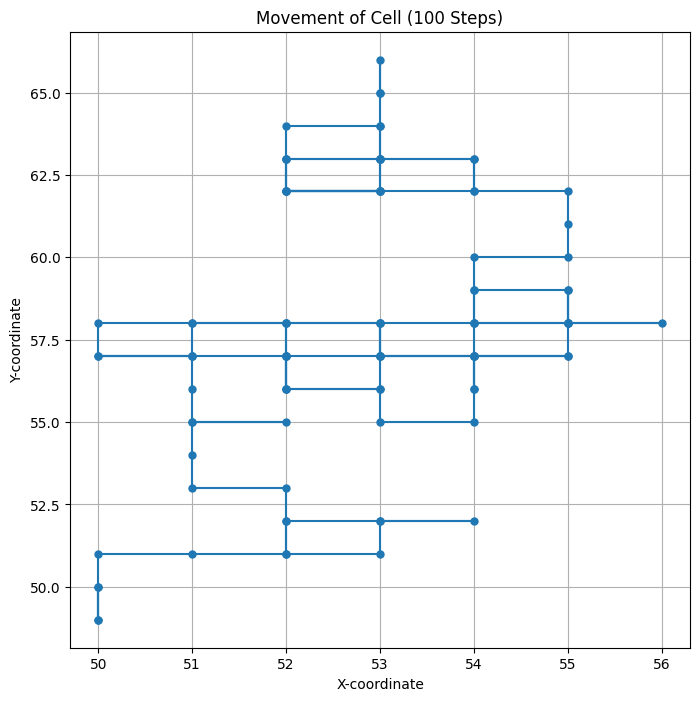

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate movement of cell
def move_cell(steps):
    # Initialize starting position of the cell
    x, y = 50, 50
    movements = []

    # Run the algorithm for specified number of steps
    for _ in range(steps):
        # Generate random numbers (0 or 1) using uniform distribution
        rand1 = np.random.uniform(0, 1)
        rand2 = np.random.uniform(0, 1)

        # Update cell position based on random numbers
        if rand1 <= 0.5 and rand2 <= 0.5:
            y += 1  # Move up
        elif rand1 <= 0.5 and rand2 > 0.5:
            y -= 1  # Move down
        elif rand1 > 0.5 and rand2 <= 0.5:
            x -= 1  # Move left
        elif rand1 > 0.5 and rand2 > 0.5:
            x += 1  # Move right

        # Append current position to list of movements
        movements.append((x, y))

    return movements

# Simulate cell movement for 100 steps
movements = move_cell(100)

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*movements)

# Plot cell movement
plt.figure(figsize=(8, 8))
plt.plot(x_coords, y_coords, marker='o', markersize=5, linestyle='-')
plt.title('Movement of Cell (100 Steps)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()


# Task 1.2

Instead of the four possible directions of movement you can have eight. Here movement along the diagnocals is also possible.

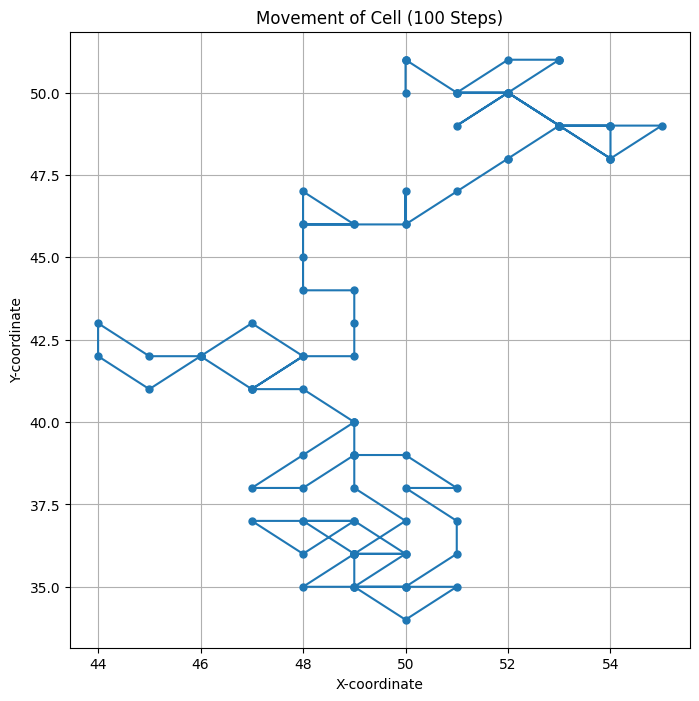

In [41]:
# Function to simulate movement of cell
def move_cell(steps):
    # Initialize starting position of the cell
    x, y = 50, 50
    movements = []

    # Run the algorithm for specified number of steps
    for _ in range(steps):
        # Generate random integers from -1 to 1 for both x-axis and y-axis movement
        rand_x = np.random.randint(-1, 2)
        rand_y = np.random.randint(-1, 2)

        # Update cell position based on random numbers
        x += rand_x
        y += rand_y

        # Append current position to list of movements
        movements.append((x, y))

    return movements

# Simulate cell movement for 100 steps
movements = move_cell(100)

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*movements)

# Plot cell movement
plt.figure(figsize=(8, 8))
plt.plot(x_coords, y_coords, marker='o', markersize=5, linestyle='-')
plt.title('Movement of Cell (100 Steps)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()

Repeat the above for 100 and 100 steps. Locate the common points in the traversal of the cell. Comment on the movements made

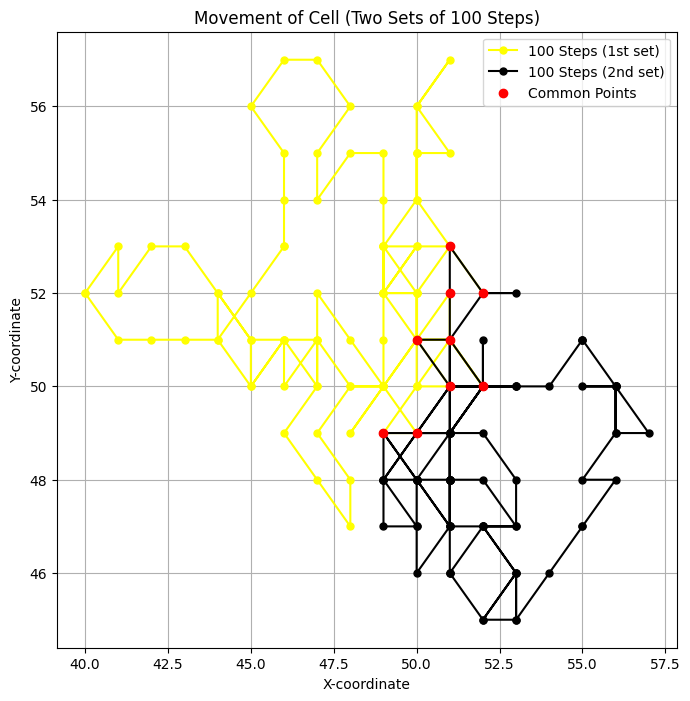

Common points in the traversal of the cell:
(50, 49)
(51, 53)
(52, 52)
(51, 50)
(50, 51)
(51, 52)
(51, 51)
(49, 49)
(52, 50)


In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Function to simulate movement of cell
def move_cell(steps):
    # Initialize starting position of the cell
    x, y = 50, 50
    movements = []

    # Run the algorithm for specified number of steps
    for _ in range(steps):
        # Generate random integers from -1 to 1 for both x-axis and y-axis movement
        rand_x = np.random.randint(-1, 2)
        rand_y = np.random.randint(-1, 2)

        # Update cell position based on random numbers
        x += rand_x
        y += rand_y

        # Append current position to list of movements
        movements.append((x, y))

    return movements

# Simulate cell movement for two sets of 100 steps
movements_100_1 = move_cell(100)
movements_100_2 = move_cell(100)

# Convert lists of movements to sets of coordinates for easier comparison
set_100_1 = set(movements_100_1)
set_100_2 = set(movements_100_2)

# Find common points in the traversal of the cell
common_points = set_100_1.intersection(set_100_2)

# Plot cell movement for 100 steps (first set)
x_coords_100_1, y_coords_100_1 = zip(*movements_100_1)
plt.figure(figsize=(8, 8))
plt.plot(x_coords_100_1, y_coords_100_1, marker='o', markersize=5, linestyle='-', label='100 Steps (1st set)', color='yellow')

# Plot cell movement for 100 steps (second set)
x_coords_100_2, y_coords_100_2 = zip(*movements_100_2)
plt.plot(x_coords_100_2, y_coords_100_2, marker='o', markersize=5, linestyle='-', label='100 Steps (2nd set)',  color='black')

# Plot common points after plotting the lines
if common_points:
    x_common, y_common = zip(*common_points)
    plt.scatter(x_common, y_common, marker='o', label='Common Points', color='red', zorder=10)  # Set z-order to plot above everything else

plt.title('Movement of Cell (Two Sets of 100 Steps)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

# Comment on the movements made
if common_points:
    print("Common points in the traversal of the cell:")
    for point in common_points:
        print(point)
else:
    print("No common points found.")

# Part II

## Task 2.1

Simulate the growth of tumour cells for t=1200. Does the growth reach a steady state? If it has not, then experiment with the final time and determine the Time required to reach a steady state.

Steady state for t_final=1200 not achieved within the simulation time.
Steady state for t_final=3000 achieved at hour 1438, with 9983397850928.703 cells


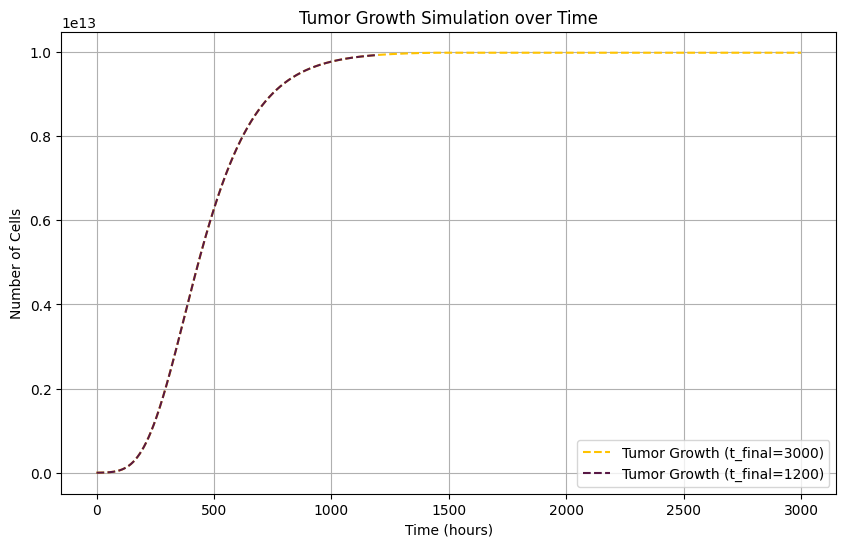

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 0.006  # Growth rate
M = 1e13   # Carrying capacity
N0 = 1e9   # Initial number of cells
t_final_1200 = 1200  # Final time for simulation (1200 hours)
t_final_3000 = 3000  # Final time for simulation (3000 hours)
convergence_threshold = 0.00001

# Time step (h)
h = 1  # One day per step; can be adjusted for finer resolution

# Time points for t_final = 1200
time_points_1200 = np.arange(0, t_final_1200 + h, h)
N_1200 = np.zeros(len(time_points_1200))
N_1200[0] = N0
steady_state_time_1200 = None

# Euler's method to solve the ODE for t_final = 1200
for i in range(1, len(time_points_1200)):
    dNdt = k * N_1200[i - 1] * np.log(M / N_1200[i - 1])
    N_1200[i] = N_1200[i - 1] + h * dNdt

    # Check for convergence
    if i > 1 and abs(N_1200[i] - N_1200[i - 1]) / N_1200[i - 1] < convergence_threshold:
        steady_state_time_1200 = time_points_1200[i]
        # Fill the rest of the array with the last value
        N_1200[i:] = N_1200[i - 1]
        break  # Then, exit the loop if steady state is achieved

# Print the time at which steady state was achieved for t_final = 1200
if steady_state_time_1200 is not None:
    steady_state_1200 = N_1200[-1]
    print(f"Steady state for t_final=1200 achieved at hour {steady_state_time_1200}, with {steady_state_1200} cells")
else:
    print("Steady state for t_final=1200 not achieved within the simulation time.")

# Time points for t_final = 3000
time_points_3000 = np.arange(0, t_final_3000 + h, h)
N = np.zeros(len(time_points_3000))
N[0] = N0
steady_state_time = None

# Euler's method to solve the ODE for t_final = 3000
for i in range(1, len(time_points_3000)):
    dNdt = k * N[i - 1] * np.log(M / N[i - 1])
    N[i] = N[i - 1] + h * dNdt

    # Check for convergence
    if i > 1 and abs(N[i] - N[i - 1]) / N[i - 1] < convergence_threshold:
        steady_state_time = time_points_3000[i]
        # Fill the rest of the array with the last value
        N[i:] = N[i - 1]
        break  # Then, exit the loop if steady state is achieved

# Print the time at which steady state was achieved for t_final = 3000
if steady_state_time is not None:
    steady_state = N[-1]
    print(f"Steady state for t_final=3000 achieved at hour {steady_state_time}, with {steady_state} cells")
else:
    print("Steady state for t_final=3000 not achieved within the simulation time.")

# Plot the results for both t_final = 3000 and t_final = 1200
plt.figure(figsize=(10, 6))

plt.plot(time_points_3000, N, label='Tumor Growth (t_final=3000)', linestyle='--', color='#FFC300')
plt.plot(time_points_1200, N_1200, label='Tumor Growth (t_final=1200)', linestyle='--', color='#581845')

#plt.axhline(M, color='r', linestyle='-', label='Carrying Capacity M')
plt.title('Tumor Growth Simulation over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Number of Cells')
plt.legend()
plt.grid(True)
plt.show()


## Task 2.2

Simulate the growth of tumour cells for t=1200. Does the growth reach a steady state? If it has not, then experiment with the final time and determine the Time required to reach a steady state.

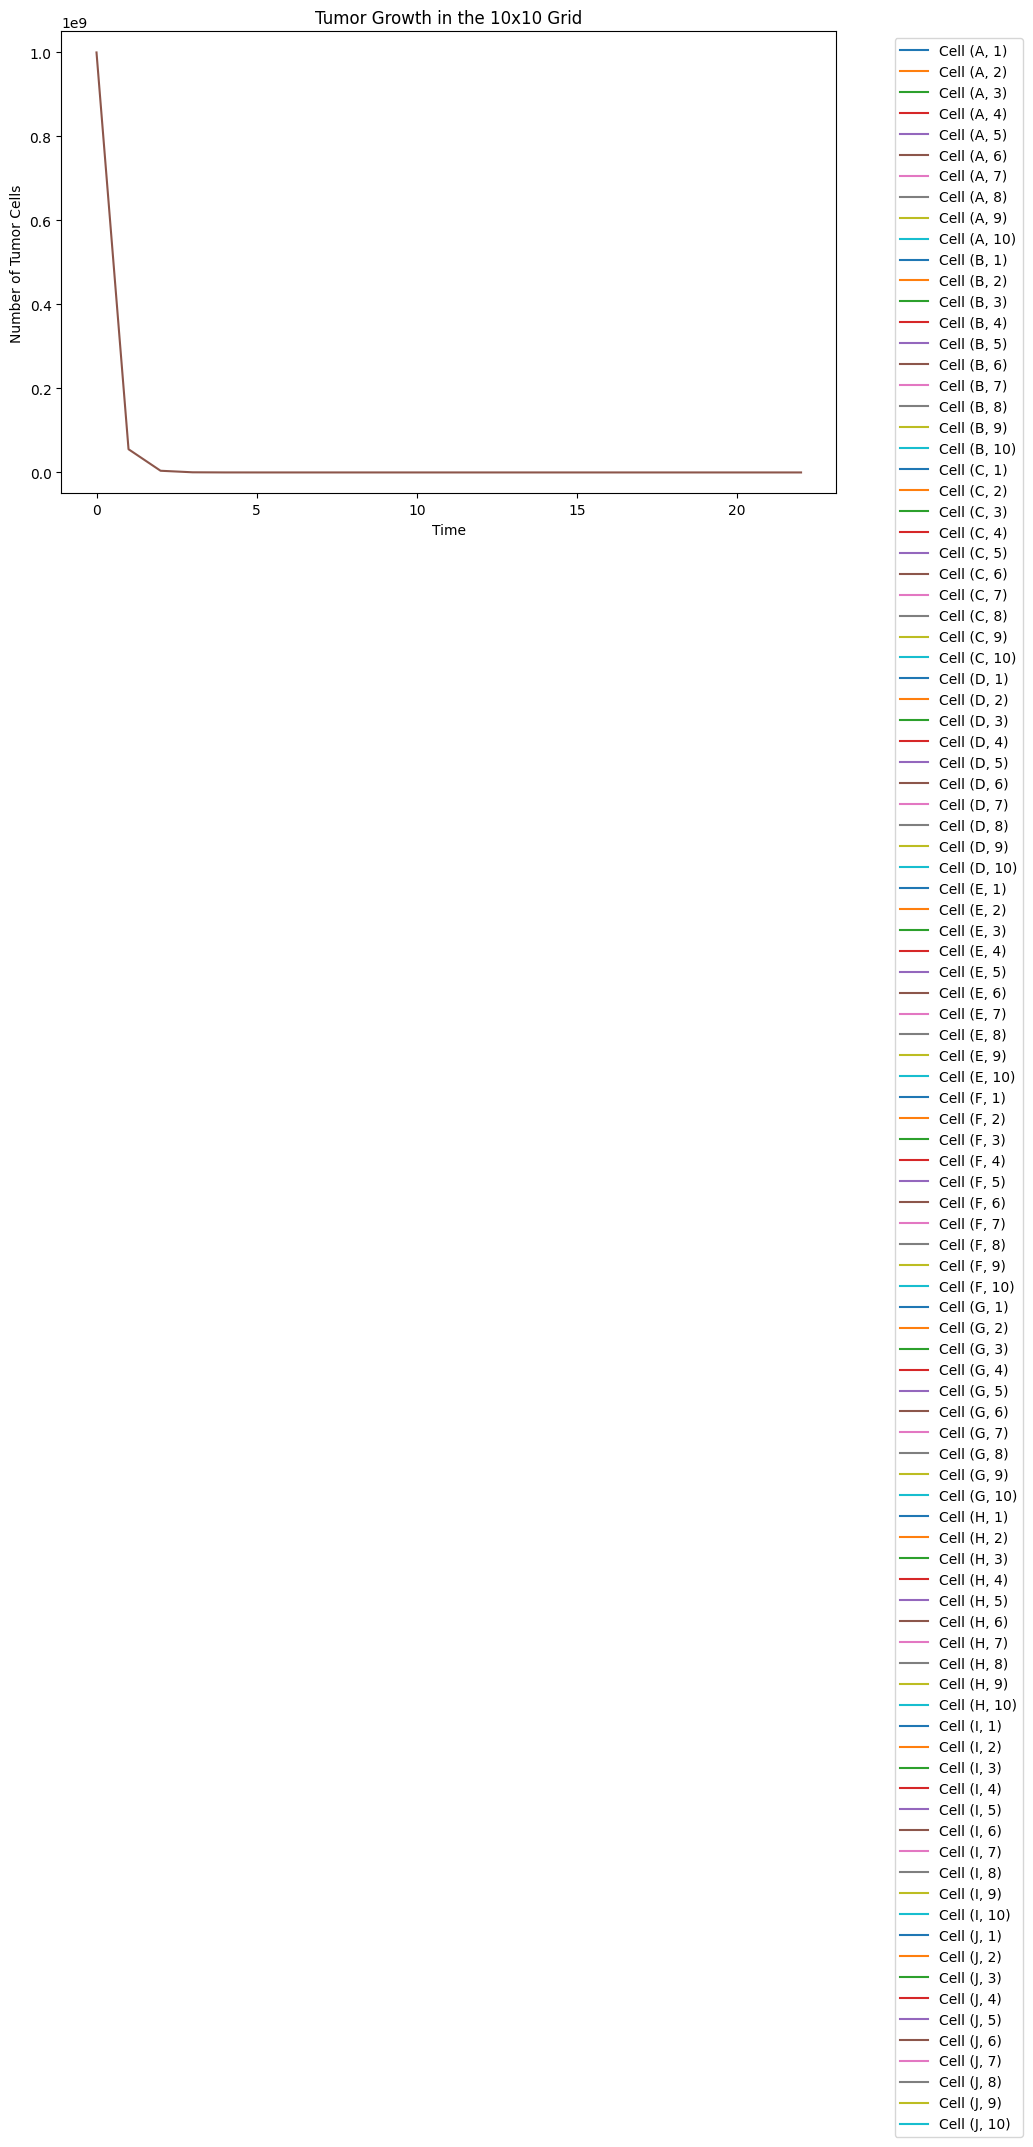

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
k = 0.006  # Growth rate
M = 1e13   # Capacity
N0 = 1e9   # Initial number of cells

# Define grid size
grid_size = (10, 10)

# Initialize grid with zeros, representing blue cells
grid = np.zeros(grid_size)

# Set initial tumor growth in the center cell
initial_cell = (grid_size[0] // 2, grid_size[1] // 2)
grid[initial_cell] = N0  # Initial number of tumor cells

# Define function to simulate tumor growth (Gompertz model)
def tumor_growth(N, k, M):
    if N == 0:
        return 0  # Set growth rate to zero when N is zero
    else:
        return k * N * np.log(M / N)


# Define function to simulate tumor growth in a single cell
def simulate_tumor_growth(initial_population, k, M, h=0.001):
    tumor_population = [initial_population]
    while not np.isclose(tumor_population[-1], tumor_growth(tumor_population[-1], k, M), rtol=1e-5):
        tumor_population.append(tumor_growth(tumor_population[-1], k, M))
    return tumor_population

# Define function to simulate tumor growth in the grid
def simulate_grid_tumor_growth(grid, k, M, h=0.001):
    # Initialize list to store tumor growth in each cell
    tumor_growth_grid = np.zeros_like(grid, dtype=object)
    
    # Simulate tumor growth in each cell
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            initial_population = grid[i, j]
            tumor_growth_grid[i, j] = simulate_tumor_growth(initial_population, k, M)
    
    return tumor_growth_grid

# Simulate tumor growth in the grid
tumor_growth_grid = simulate_grid_tumor_growth(grid, k, M)

# Plot tumor growth in the grid
plt.figure(figsize=(10, 6))
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        plt.plot(tumor_growth_grid[i, j], label=f'Cell ({chr(65+i)}, {j+1})')

plt.xlabel('Time')
plt.ylabel('Number of Tumor Cells')
plt.title('Tumor Growth in the 10x10 Grid')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()
